#Creating my project name (6.16)
###Purpose: 
Quickly build a W2V model on the description... down & dirty

###Background: 
Need to get that URL!

In [1]:
import airbnblisting as airl
from bs4 import BeautifulSoup
import json

In [30]:
reload(airl)
DB_NAME = 'airbnb'
COLL_NAME = 'listings'

air_listing = airl.AirBnBListing(db_name=DB_NAME, coll_name=COLL_NAME)
air_listing

In [5]:
listing_list = list(air_listing.coll.find({},{'_id':1}))

###Testing & iterating the '_extract_features_for_project_name' method

In [26]:
x = listing_list[20]   # Used 20 for no damn good reason
x

{u'_id': u'5650515'}

In [23]:
air_listing.pull_from_db(listing_id = x['_id'])

In [28]:
d = air_listing._extract_features_for_project_name().split()
d

[u'we',
 u'are',
 u'looking',
 u'for',
 u'roommates',
 u'and',
 u'people',
 u'that',
 u'become',
 u'a',
 u'family',
 u'member',
 u'to',
 u'us',
 u'please',
 u'note',
 u'above',
 u'all',
 u'that',
 u'this',
 u'studio',
 u'is',
 u'in',
 u'the',
 u'basement',
 u'area',
 u'of',
 u'my',
 u'home',
 u'and',
 u'it',
 u'does',
 u'not',
 u'have',
 u'a',
 u'window',
 u'i',
 u'am',
 u'listing',
 u'it',
 u'as',
 u'shared',
 u'but',
 u'it',
 u'is',
 u'not',
 u'shared',
 u'only',
 u'that',
 u'you',
 u'will',
 u'pass',
 u'through',
 u'the',
 u'basement',
 u'room',
 u'in',
 u'order',
 u'for',
 u'you',
 u'to',
 u'get',
 u'to',
 u'the',
 u'studio',
 u'next',
 u'to',
 u'it',
 u'whether',
 u'it',
 u'is',
 u'to',
 u'do',
 u'something',
 u'or',
 u'whether',
 u'someone',
 u'else',
 u'is',
 u'staying',
 u'in',
 u'the',
 u'studio',
 u'it',
 u'has',
 u'a',
 u'wall',
 u'and',
 u'a',
 u'door',
 u'tofrom',
 u'the',
 u'studio',
 u'we',
 u'have',
 u'owned',
 u'this',
 u'fabulous',
 u'house',
 u'since',
 u'1994',
 u'i

In [19]:
import string
import re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
re.compile('[%s]' % re.escape(string.punctuation)).sub('', d)

u'We are looking for roommates and people that become a family member to us\nPlease note above all that this STUDIO IS IN THE BASEMENT AREA OF MY HOME AND IT DOES NOT HAVE A WINDOW \nI am listing it as SHARED BUT IT IS NOT SHARED ONLY THAT YOU  WILL PASS THROUGH THE BASEMENT ROOM in order for you to get to the STUDIO NEXT TO IT WHETHER IT IS TO DO SOMETHING OR WHETHER SOMEONE ELSE IS STAYING IN THE STUDIO IT HAS A WALL AND A DOOR TOFROM THE STUDIO\nWe have owned this fabulous house since 1994 It is a blessed single home in one of the best neighborhoods in town  The sophisticated neighborhood that we live in is very safe and as the saying goes LOCATION IS EVERYTHING This is true for us We have our own police water fountains parks gardens basket ball tennis courts and I personally love the fact that our home overlooks the Pacific ocean even though is about 5060 blocks away we are blessed to see the ocean\nOur home is what my kids call Safari I the mom am the one in charge of creating bab

### Running the function across all listings

In [49]:
import matplotlib.pyplot as plt
%pylab inline
import gensim

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [120]:
corpus = []
for l in listing_list:
    air_listing.pull_from_db(listing_id = l['_id'])
    corpus.append(air_listing._extract_features_for_project_name().split())

360 4228 0.09


(array([ 858.,  775.,  773.,  605.,  412.,  259.,  167.,  115.,   76.,
          57.,   34.,   24.,   12.,   10.,   12.,    8.,    7.,    5.,
           3.,    3.,    0.,    3.,    0.,    1.,    2.,    1.,    1.,
           1.,    0.,    3.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([    0. ,    91.2,   182.4,   273.6,   364.8,   456. ,   547.2,
          638.4,   729.6,   820.8,   912. ,  1003.2,  1094.4,  1185.6,
         1276.8,  1368. ,  1459.2,  1550.4,  1641.6,  1732.8,  1824. ,
         1915.2,  2006.4,  2097.6,  2188.8,  2280. ,  2371.2,  2462.4,
         2553.6,  2644.8,  2736. ,  2827.2,  2918.4,  3009.6,  3100.8,
         3192. ,  3283.2,  3374.4,  3465.6,  3556.8,  3648. ,  3739.2,
         3830.4,  3921.6,  4012.8,  4104. ,  4195.2,  4286.4,  4377.6,
         4468.8,  4560. ]),
 <a list of 50 Patch objects>)

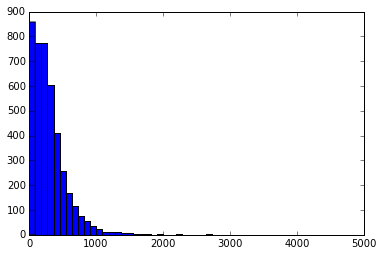

In [46]:
lens = [len(x) for x in corpus]
zeros = [x for x in lens if x==0]
print len(zeros), len(corpus), round(float(len(zeros))/len(corpus),2)
plt.hist(lens, bins=50)

In [47]:
non_zero_corpus = [x for x in corpus if len(x)>0]

In [51]:
model = gensim.models.Word2Vec(non_zero_corpus, min_count=2)
#model = Word2Vec(non_zero_corpus, min_count=2)

In [108]:
model.most_similar(positive=['local', 'house'], negative=['hotel'])
model.most_similar(positive=['locale'], negative=[])

[(u'quaint', 0.716982364654541),
 (u'subdivision', 0.7020805478096008),
 (u'familyfriendly', 0.6784224510192871),
 (u'boogaloos', 0.6701169013977051),
 (u'paradise', 0.6616237163543701),
 (u'apartmenttransportation', 0.6545734405517578),
 (u'treacherous', 0.6542689800262451),
 (u'alleyway', 0.6449316740036011),
 (u'415', 0.6446349620819092),
 (u'inner', 0.6446177959442139)]

In [77]:
from collections import defaultdict

d = defaultdict(int)
for word, obj in model.vocab.iteritems():
    d[word] = obj.count

In [84]:
sorted(dict(d), key=lambda x: d[x], reverse=True)

[u'the',
 u'and',
 u'a',
 u'to',
 u'is',
 u'of',
 u'in',
 u'you',
 u'with',
 u'for',
 u'are',
 u'on',
 u'from',
 u'or',
 u'have',
 u'your',
 u'we',
 u'room',
 u'will',
 u'apartment',
 u'as',
 u'be',
 u'there',
 u'i',
 u'this',
 u'can',
 u'all',
 u'it',
 u'at',
 u'that',
 u'if',
 u'street',
 u'has',
 u'kitchen',
 u'away',
 u'walk',
 u'our',
 u'one',
 u'also',
 u'park',
 u'neighborhood',
 u'restaurants',
 u'blocks',
 u'2',
 u'very',
 u'bed',
 u'access',
 u'an',
 u'bedroom',
 u'home',
 u'city',
 u'by',
 u'new',
 u'but',
 u'living',
 u'minutes',
 u'san',
 u'my',
 u'great',
 u'not',
 u'area',
 u'two',
 u'house',
 u'available',
 u'just',
 u'so',
 u'located',
 u'guests',
 u'full',
 u'its',
 u'block',
 u'private',
 u'train',
 u'bathroom',
 u'out',
 u'parking',
 u'francisco',
 u'space',
 u'bus',
 u'up',
 u'building',
 u'stay',
 u'please',
 u'1',
 u'large',
 u'which',
 u'no',
 u'other',
 u'subway',
 u'free',
 u'walking',
 u'about',
 u'3',
 u'get',
 u'well',
 u'minute',
 u'any',
 u'within',
 u'ma

In [110]:
re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', "WHAT THE FUCK ?!?!")

'WHAT THE FUCK     '

In [119]:
"WHAT   THE FUCK".replace(, " ")

TypeError: can't multiply sequence by non-int of type 'str'